In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

from utils import scatter_plot, qqplot
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# Import Dataset

In [2]:
train = pd.read_csv('./data/thalweg_train_set.csv', converters={'site_no': str}, low_memory=False)
test = pd.read_csv('./data/thalweg_test_set.csv', converters={'site_no': str}, low_memory=False)

## LOC Results

In [3]:
x = train['mean_depth_va'].to_numpy()
y = train['max_depth_va'].to_numpy()
xt = test['mean_depth_va'].to_numpy()
yt = test['max_depth_va'].to_numpy()

In [4]:
slope = (np.std(y) / np.std(x))
intercept = (np.mean(y) - (np.std(y) / np.std(x)) * np.mean(x))
print(f'slope:{slope:.4f}')
print(f'intercept:{intercept:.4f}')

slope:1.4804
intercept:-0.0489


In [5]:
y_loc = (slope * xt) + intercept

test size: (8927,), pred size: (8927,)
NSE: 0.9180, R2: 0.9205, PBias: -0.8577, RMSE: 2.1520


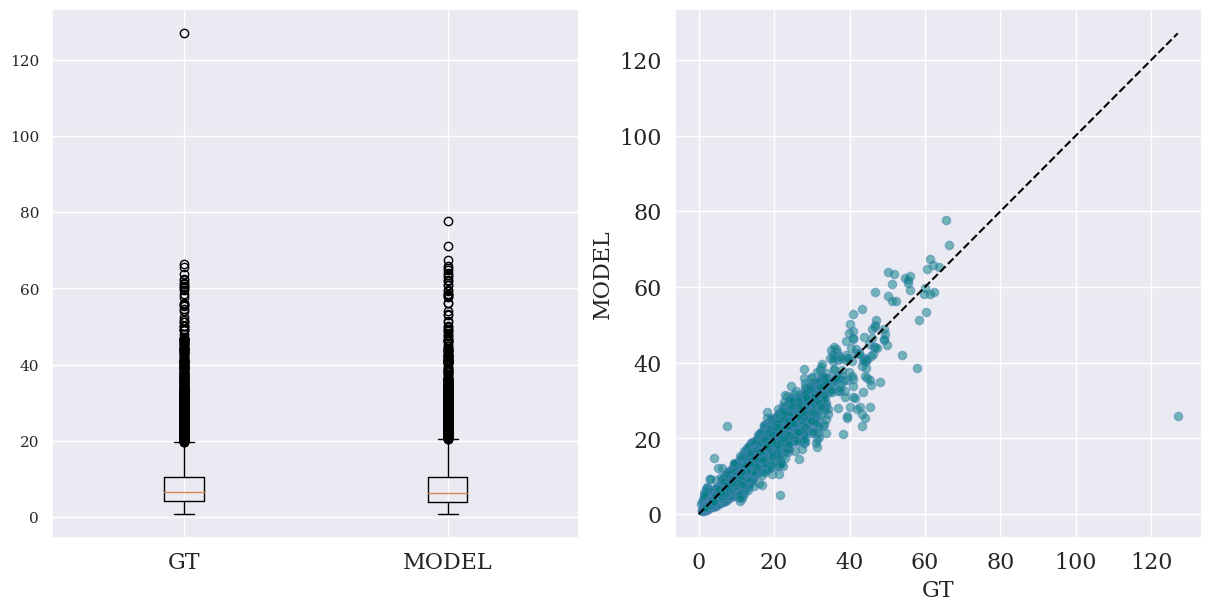

In [6]:
scatter_plot(yt, y_loc)

# MLP Results

In [8]:
data = np.loadtxt('./data/ml-test.out', delimiter=',')
y_mlp = data[:, 1]

test size: (8927,), pred size: (8927,)
NSE: 0.9109, R2: 0.9125, PBias: -2.2530, RMSE: 2.2427


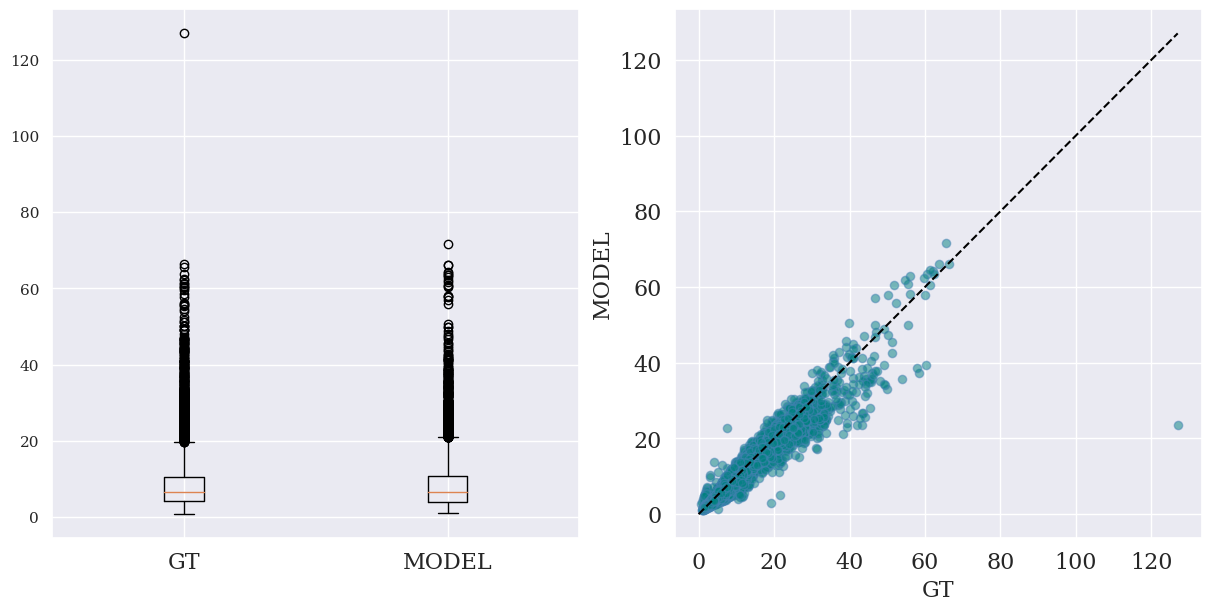

In [9]:
scatter_plot(yt, y_mlp)

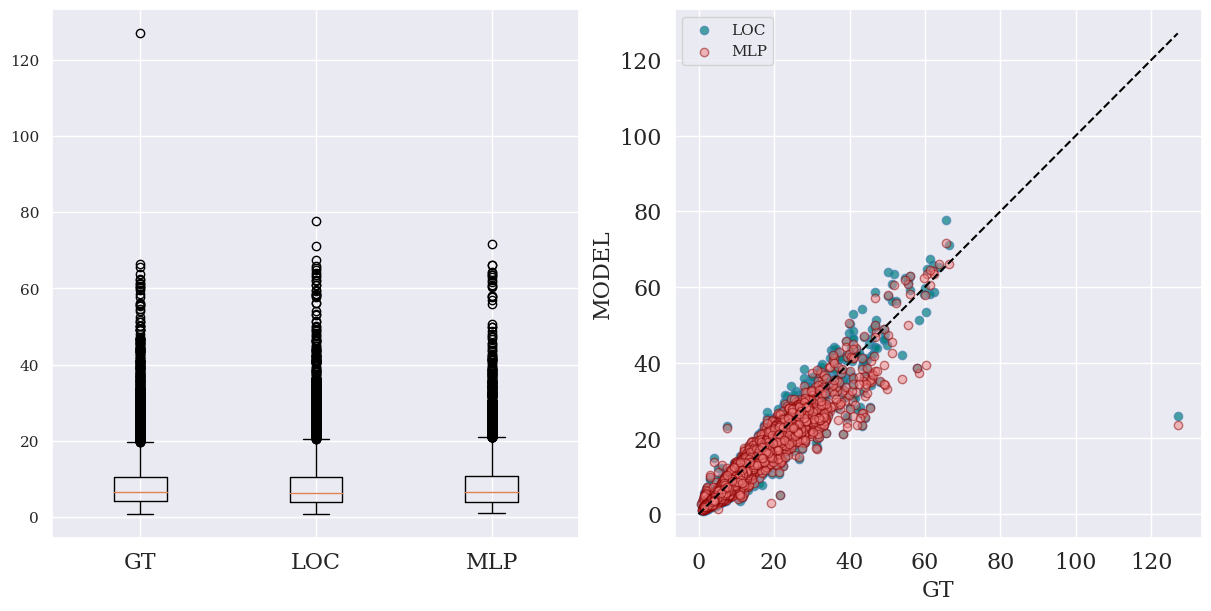

In [10]:
yt = np.array(yt).reshape(-1,)
y_loc = np.array(y_loc).reshape(-1,)
y_mlp = np.array(y_mlp).reshape(-1,)

plt.rcParams.update({
    # 'font.sans-serif': 'Comic Sans MS',
    'font.family': 'serif'
})

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6), constrained_layout=True)

ax1.boxplot([yt, y_loc, y_mlp], notch=False, showfliers=True)
ax1.set_xticklabels(['GT', 'LOC', 'MLP'])
ax1.tick_params(axis='x', labelrotation=0, labelsize=16)
ax1.grid(True)
# ax1.set_title(f'BOX PLOT')

max_value = np.array((yt, y_loc, y_mlp)).max()

ax2.scatter(yt, y_loc, color='teal', edgecolor='steelblue', alpha=0.7, label='LOC')
ax2.scatter(yt, y_mlp, color='lightcoral', edgecolor='darkred', alpha=0.5, label='MLP')
ax2.plot([0, max_value], [0, max_value], '--', color='black', linewidth=1.5)

ax2.set_xlabel(f'GT', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
# ax2.set_xlim(0, max_value)

ax2.set_ylabel(f'MODEL', fontsize=16)
ax2.tick_params(axis='y', labelsize=16)
# ax2.set_ylim(0, max_value)
ax2.grid(True)

plt.legend()
plt.savefig(f'./data/loc_vs_mlp.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

plt.show()


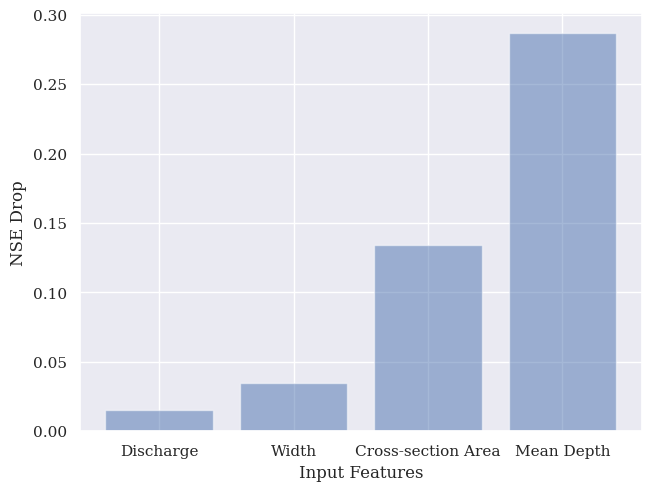

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

plt.rcParams.update({
    # 'font.sans-serif': 'Comic Sans MS',
    'font.family': 'serif'
})

input_features = ['Discharge', 'Width', 'Cross-section Area', 'Mean Depth']
pos = np.arange(len(input_features))
pi = [0.0150, 0.0351, 0.1339, 0.2869]

fig, ax = plt.subplots(constrained_layout=True)

ax.bar(pos, pi, align='center', alpha=0.5)
ax.set_xticks(pos, input_features)
ax.set_ylabel('NSE Drop')
ax.set_xlabel('Input Features')

plt.grid(True)

plt.savefig(f'./data/ftr_imp.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()
